<a href="https://colab.research.google.com/github/gumushane-eem-eesec-440/xor-MLP-TF-keras/blob/main/code/xor_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En başta bu kodda kullanacağımız **fonksiyonları** çağıracağımız **kütüphaneleri** dahil ediyoruz.</br>First we import the **libraries** to use the **functions** that we are going to invoke in this code.

In [ ]:
import tensorflow as tf # Google tarafından geliştirilen TF kütüphanesi, en ciddi rakibi Facebook tarafından geliştirilen Pytorch kütüphanesi
import matplotlib.pyplot as plt # grafik çizdirmek için
import numpy as np # numerical python kütüphanesi
import pandas as pd
import sys
from numpy import random

Bildiğimiz gibi, *XOR* problemi *Elektrik-Elektronik Mühendisliğinde* mantıksal devreler (**logic circuits**) alanında karşımıza çıkan bir problem. İki girişli ve tek çıkışlı (**two input one output**) bir sistemin girişleri *TRUE-FALSE* (veya *1-0* veya *HIGH-LOW*) olarak isimlendirilen *Boolean* veri tipinde değer alıyorlar. Benzer şekilde çıkış da yine *1-0* Boolean değişkenlerinden birisi oluyor.

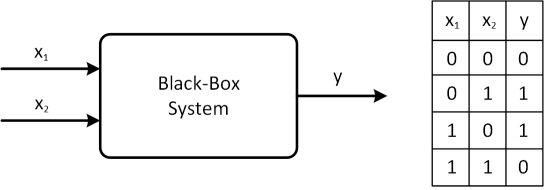

Aşağıda **numpy** kütüphanesi kullanarak giriş (**input**) ve hedef (**target**) verilerini oluşturduk. Dikkat edin, burada hedef verisine İngilizce'de **annonation** deniyor. Yani bizler hedef değişkenini oluşturduğumuzda giriş verisini **annotate** etmiş (etiket - **label**) oluyoruz.

In [ ]:
trainingData = np.array([[0,0], [0,1], [1,0], [1,1]], "float32")
targetData = np.array([[0], [1], [1], [0]], "float32")

Yukarıda ürettiğimiz giriş-çıkış verisini aşağıda konsola yazdıralım.

Let's print out the **input-output data** generated above in the console.

In [ ]:
print(trainingData)
print(targetData)

[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
[[0.]
 [1.]
 [1.]
 [0.]]


**TF** kütüphanesinin içerisinde yer alan **Keras** kütüphanesiyle bir tane çok katmanlı sinir ağı (**multi-layer perceptron** - **MLP**) oluşturalım. Giriş sayısının iki, çıkış sayısının bir olduğunu, gizli katman (**hidden layer**) sayısını ve bu katmanlardaki nöron sayısını (**number of neurons**) ve de hangi aktivasyon fonksiyonunu (**activation function**) kullandığımızı adım adım seçeceğiz.

In [ ]:
model = tf.keras.models.Sequential(layers=None, name='xor_MLP')
model.add(tf.keras.layers.Dense(16, input_dim = 2, activation = 'relu', name='HL1'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid', name='outputLayer'))

Yukarıdaki kodda yapay sinir ağımızın yapısını (**structure**) yani katman sayısı, katmanlardaki nöron miktarı, nöron çıkışlarında kullanılan aktivasyon fonksiyon tiplerini belirledik. Bir sonraki adım olarak öğrenme (**learning**) işlemini başlatacağız. Şimdi öğrenme işleminin nasıl olacağını belirleyelim.

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics='binary_accuracy')
model.summary()

Model: "xor_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
HL1 (Dense)                  (None, 16)                48        
_________________________________________________________________
outputLayer (Dense)          (None, 1)                 17        
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


Son olarak konfigürasyonunu tamamladığımız çok katmanlı yapay sinir ağının eğitimini başlatıyoruz.

In [ ]:
history=model.fit(trainingData, targetData, epochs=150, verbose=1)

Epoch 1/150
1/1 [==============================] - 0s 317ms/step - loss: 0.2607 - binary_accuracy: 0.5000
Epoch 2/150
1/1 [==============================] - 0s 4ms/step - loss: 0.2601 - binary_accuracy: 0.2500
Epoch 3/150
1/1 [==============================] - 0s 6ms/step - loss: 0.2596 - binary_accuracy: 0.2500
Epoch 4/150
1/1 [==============================] - 0s 5ms/step - loss: 0.2590 - binary_accuracy: 0.2500
Epoch 5/150
1/1 [==============================] - 0s 5ms/step - loss: 0.2585 - binary_accuracy: 0.2500
Epoch 6/150
1/1 [==============================] - 0s 6ms/step - loss: 0.2579 - binary_accuracy: 0.2500
Epoch 7/150
1/1 [==============================] - 0s 5ms/step - loss: 0.2574 - binary_accuracy: 0.2500
Epoch 8/150
1/1 [==============================] - 0s 8ms/step - loss: 0.2569 - binary_accuracy: 0.2500
Epoch 9/150
1/1 [==============================] - 0s 3ms/step - loss: 0.2564 - binary_accuracy: 0.2500
Epoch 10/150
1/1 [==============================] - 0s 3ms/ste

In [ ]:
model.predict(trainingData).round()

array([[1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

Text(0.5, 0, 'epoch number')

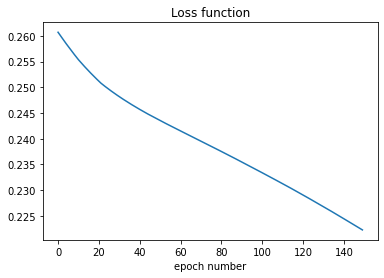

In [ ]:
lossCurve = history.history["loss"]
plt.plot(lossCurve, label="Train")
# plt.legend(loc='upper right')
plt.title("Loss function")
plt.xlabel("epoch number")

Text(0.5, 0, 'epoch number')

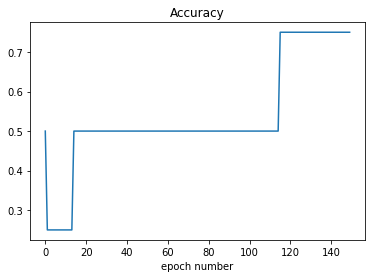

In [ ]:
accuracyCurve = history.history["binary_accuracy"]
plt.plot(accuracyCurve, label="Accuracy")
# plt.legend(loc='upper right')
plt.title("Accuracy")
plt.xlabel("epoch number")